# Занятие 5. Кластерный анализ

Веберите любые данные для задачи кластеризации из репозитория данных для машинного обучения (UCI Machine learning repository: http://archive.ics.uci.edu/ml/index.php) или возьмите свои данные и проведите кластерный анализ с использованием метода иерархической кластеризации и метода kNN. Комментарии к каждому разделу обязательны.

## Иерархическая кластеризация

Данные содержат информация о длине и ширине лепестков и чашелистников для трех видов ирисов.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import os

In [ ]:
import pandas as pd
from pandas import read_csv
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Данные нет смысла стандартизировать, но необходимо факторизовать последний столбец.

In [ ]:
df['classID'] = pd.factorize(df['species'])[0]
df.drop('species', axis=1, inplace=True)

Применим алгоритм иерархической кластеризации и построим дендрограмму. Все необходимые вычисления проводятся в функции linkage. Кроме самих данных, ей нужно передать на вход два аргумента: метод вычисления расстояний между кластерами (ward, single, complete, average) и метрику (euclidean (default), cityblock aka Manhattan, hamming, cosine)

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Объект, в котором будет хранится информация о последовательном слиянии кластеров
link = linkage(df, 'ward', 'euclidean')

In [ ]:
link[:5]

array([[9.00e+00, 3.40e+01, 0.00e+00, 2.00e+00],
       [3.70e+01, 1.50e+02, 0.00e+00, 3.00e+00],
       [1.01e+02, 1.42e+02, 0.00e+00, 2.00e+00],
       [7.00e+00, 3.90e+01, 1.00e-01, 2.00e+00],
       [0.00e+00, 1.70e+01, 1.00e-01, 2.00e+00]])

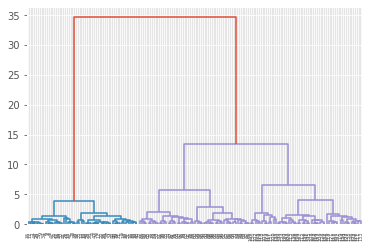

In [ ]:
dn = dendrogram(link)

В дендрограмме выделены два кластера, но, судя по исходным данным кластеров три (так как видов растений три).

In [ ]:
df['cluster'] = fcluster(link, 3, criterion='maxclust')

In [ ]:
df.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width,classID
cluster,,,,,
1,5.006,3.418,1.464,0.244,0.0
2,5.936,2.770,4.260,1.326,1.0
3,6.588,2.974,5.552,2.026,2.0


In [ ]:
df.groupby('cluster').size()

cluster
1    50
2    50
3    50
dtype: int64

Это значит, что в три разных кластера попали три разных вида цветов! Так как имеется равное количество наблюдений про каждый вид, размеры кластеров также равны.  

In [ ]:
# растояния между слитыми кластерами
dist = link[:, 2]
dist;

Text(22, 2.6, '4 clusters')

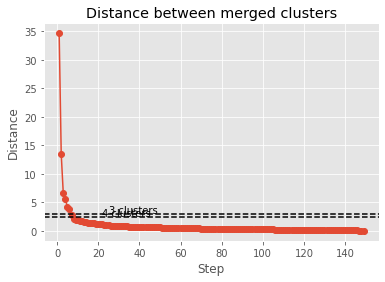

In [ ]:
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')
plt.axhline(3, c='k', linestyle='dashed')
plt.axhline(2.52, c='k', linestyle='dashed')
plt.text(25, 3.1, '3 clusters')
plt.text(22, 2.6, '4 clusters')

По графику можно сделать вывод о том, что если мы оставим растояние на уровне примерно 3-3.5, то получим 3-4 кластера. Таким образом, вывод о колиечстве кластеров, который был сделан ранее, можно считать корректным. 

## Кластеризация методом k-means (k-средних)

In [ ]:
import pandas as pd
from pandas import read_csv
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df['classID'] = pd.factorize(df['species'])[0]
df.drop('species', axis=1, inplace=True)

Для кластеризации методом k-means необходимо задать k наперёд. Попробуем k = 3, исходя из интерпретации данных.

In [ ]:
from sklearn.cluster import KMeans
# инициализация модели
model = KMeans(n_clusters=3, random_state=42)
# random_state - зерно датчика случайных чисел. 
# При каждом новом вызове с одинаковыми random_state модель будет давать одинаковые результаты.

In [ ]:
model.fit(df)

KMeans(n_clusters=3, random_state=42)

In [ ]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Наблюдаем почти такое же разбиение на кластеры, как и в предыдущем пункте.

In [ ]:
model.cluster_centers_

array([[6.62244898, 2.98367347, 5.57346939, 2.03265306, 2.        ],
       [5.006     , 3.418     , 1.464     , 0.244     , 0.        ],
       [5.91568627, 2.76470588, 4.26470588, 1.33333333, 1.01960784]])

Средние близки к средним, полученныи ранее.

In [ ]:
# предсказание для новых наблюдений. Метод predict.
new_items = [
    [6.6, 2, 6, 3, 2],
    [6,3,5,1,1]
]
model.predict(new_items)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


array([0, 2], dtype=int32)

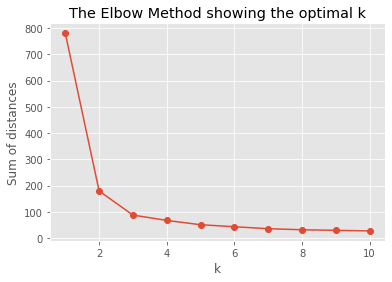

In [ ]:
K = range(1, 11)
models = [KMeans(n_clusters=k, random_state=42).fit(df) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

После разбиения более чем на 3 кластера производная резко затухает. Поэтому можно сказать, что 3 кластера - оптимальный выбор для выбранных данных.

In [ ]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df)
df['cluster'] = model.labels_
df.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width,classID
cluster,,,,,
0,6.622449,2.983673,5.573469,2.032653,2.000000
1,5.006000,3.418000,1.464000,0.244000,0.000000
2,5.915686,2.764706,4.264706,1.333333,1.019608


Больше всего кластеры отличаются от друг друга шириной лепестка. Первый вид также резко выделяется малой длиной лепестка и более широким чашелистником. В нулевом кластере у цветов самые широкие лепестки и саиые длинные чашелистники.

In [ ]:
df.groupby('cluster').size()

cluster
0    49
1    50
2    51
dtype: int64